<a href="https://colab.research.google.com/github/sreelekaa/linear-regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION**

In [3]:
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("Housing.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


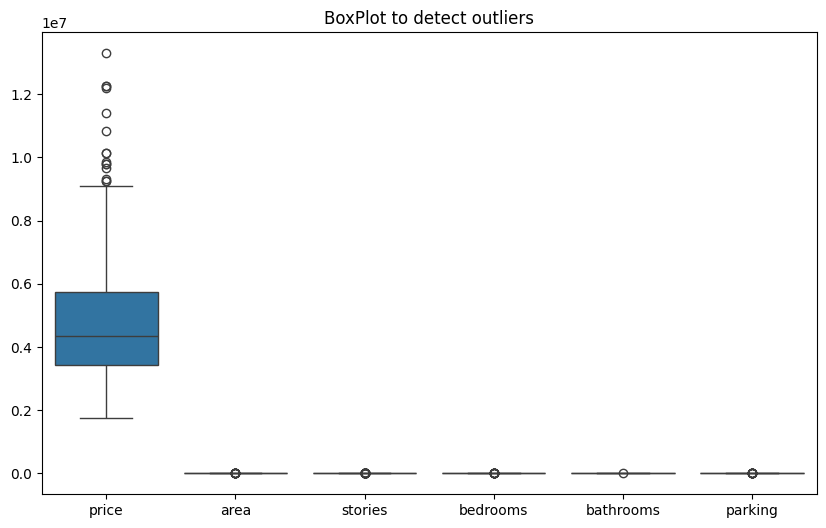

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[["price","area","stories","bedrooms","bathrooms","parking"]])
plt.title("BoxPlot to detect outliers")
plt.show()


" *alternative to detect outliers in separate way* "










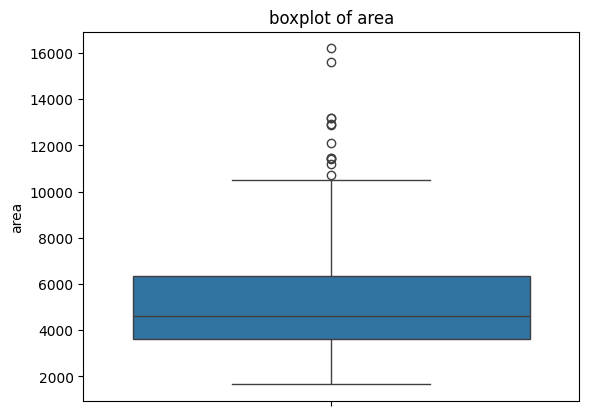

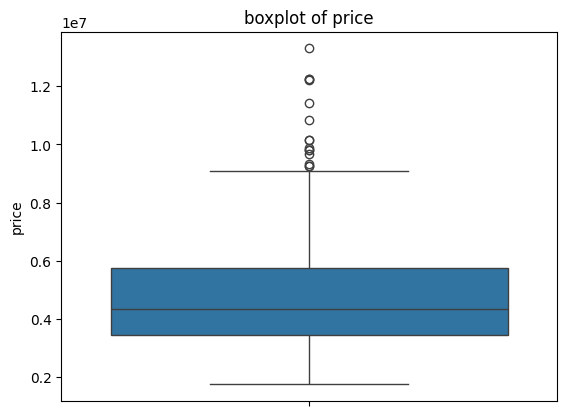

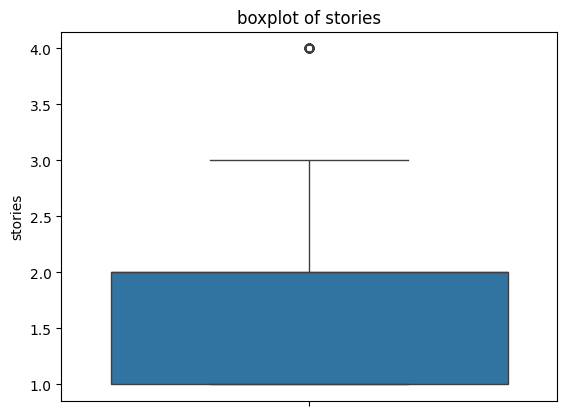

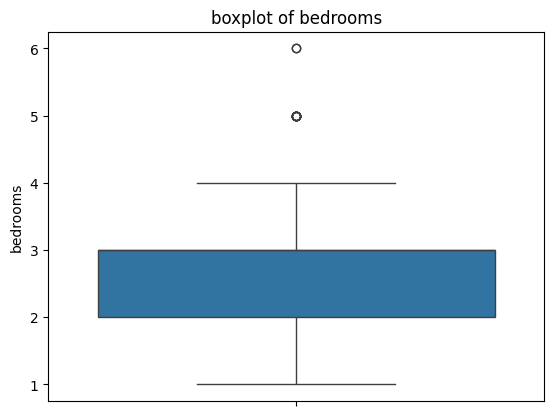

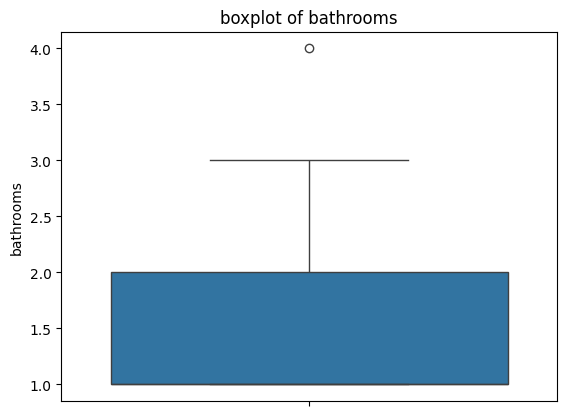

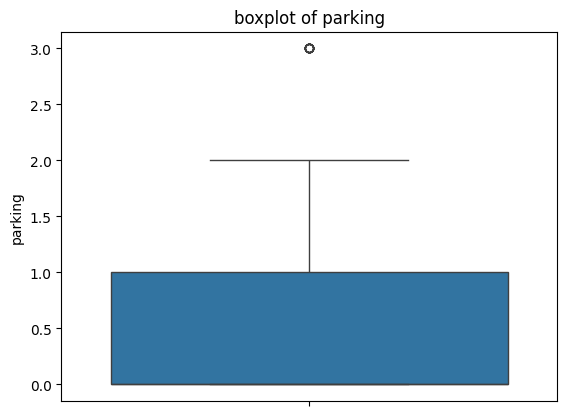

In [13]:
for col in ['area','price','stories','bedrooms','bathrooms','parking']:
    sns.boxplot(data=df[col])
    plt.title(f'boxplot of {col}')
    plt.show()

Outlier detection using IQR Method for price column

In [14]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1

In [15]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

find outliers

In [18]:
outliers=df[(df['price']<lower_bound)|(df['price']>upper_bound)]
print("Number of outliers: ",len(outliers))

Number of outliers:  15


In [21]:
print("Original shape:", df.shape)

Original shape: (545, 13)


In [20]:
no_outliers=df[(df['price']<=lower_bound)&(df['price']>=upper_bound)]
print("Shape after removing outliers: ",no_outliers.shape)

Shape after removing outliers:  (0, 13)


Convert Categorical Columns to Numeric

In [24]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [27]:
df=pd.get_dummies(df,drop_first=True)
# Convert True/False to 1/0
df = df.astype(int)


In [28]:
print(df.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2             1   
1  12250000  8960         4          4        4        3             1   
2  12250000  9960         3          2        2        2             1   
3  12215000  7500         4          2        2        3             1   
4  11410000  7420         4          1        2        2             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0                    1   
2              0             1                    0                    0   
3              0             1                    0                    1   
4              1             1                    0                    1   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0             1  

Split X and Y

In [29]:
X=df.drop('price',axis=1)
Y=df['price']

Scaling the data when the outliers are found in dataset

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [32]:
X_Scaled=scaler.fit_transform(X)

Train and Testing the data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X_Scaled,Y,test_size=0.2,random_state=42)

Create the model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model=LinearRegression()

In [37]:
model.fit(X_train,Y_train)

LinearRegression()

In [38]:
y_pred=model.predict(X_test)

Evaluating the model using metrics like Mean Squared Error(MSE) and R-Squared

In [45]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [41]:
mse=mean_squared_error(Y_test,y_pred)

In [42]:
r2=r2_score(Y_test,y_pred)

In [46]:
mae=mean_absolute_error(Y_test,y_pred)

In [47]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 1754318687330.6675
Mean Absolute Error: 970043.403920164
R-squared: 0.6529242642153177


Plotting the regression Line

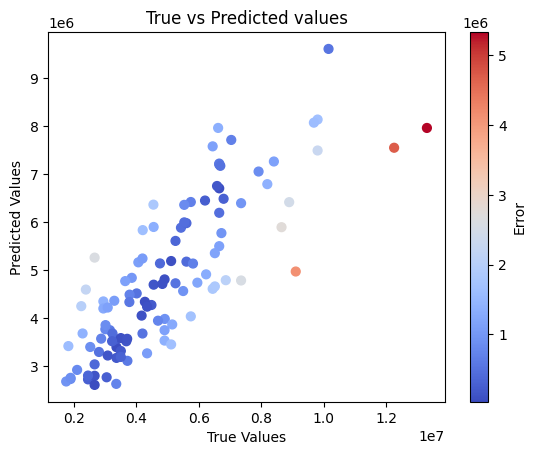

In [54]:
import numpy as np

# Calculate error
errors = abs(Y_test - y_pred)

# Create scatter plot
plt.scatter(Y_test, y_pred, c=errors, cmap='coolwarm', s=40)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted values')

plt.colorbar(label='Error')
plt.show()
